In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib

import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

import seaborn as sns
import scipy.stats as stats

In [2]:
csv3 = '../Output/Visu_Final_Life_mean.csv'
csv4 = '../Output/Visu_Final_Income_mean.csv'
csv5 = '../Output/Visu_Life_All_Cities.csv'
csv6 = '../Output/Visu_Income_All_Cities.csv'

In [3]:
life_mean_df = pd.read_csv(csv3)
Income_mean_df = pd.read_csv(csv4)
Country_Life_df = pd.read_csv(csv5)
Country_Income_df = pd.read_csv(csv6)

In [4]:
life_mean_df.head()

,County,Life Expectancy
0,"Alameda County, CA",80.845858
1,"Allegheny County, PA",77.236134
2,"Ascension Parish, LA",78.400000
3,"Beaver County, PA",77.204000
4,"Butler County, PA",78.867442


In [5]:
Income_mean_df.head()

,County,All Ages in Poverty Percent,Median Household Income
0,Alameda County (CA),12.800000,72504.500000
1,Allegheny County (PA),12.800000,51033.333333
2,Ascension Parish (LA),11.983333,67183.166667
3,Beaver County (PA),12.583333,48246.666667
4,Butler County (PA),9.266667,58961.666667


In [6]:
Final_Income_Life_mean_df = pd.merge(life_mean_df, Income_mean_df, left_index=True, right_index=True)
Final_Income_Life_mean_df

,County_x,Life Expectancy,County_y,All Ages in Poverty Percent,Median Household Income
0,"Alameda County, CA",80.845858,Alameda County (CA),12.800000,72504.500000
1,"Allegheny County, PA",77.236134,Allegheny County (PA),12.800000,51033.333333
2,"Ascension Parish, LA",78.400000,Ascension Parish (LA),11.983333,67183.166667
3,"Beaver County, PA",77.204000,Beaver County (PA),12.583333,48246.666667
4,"Butler County, PA",78.867442,Butler County (PA),9.266667,58961.666667
5,"Contra Costa County, CA",80.813333,Contra Costa County (CA),10.633333,77401.666667
6,"East Baton Rouge Parish, LA",74.965432,East Baton Rouge Parish (LA),19.283333,47202.333333
7,"East Feliciana Parish, LA",76.000000,East Feliciana Parish (LA),20.483333,41621.666667
8,"Iberville Parish, LA",74.028571,Iberville Parish (LA),22.483333,41200.500000
9,"Livingston Parish, LA",76.040000,Livingston Parish (LA),13.500000,55066.666667


In [7]:
del Final_Income_Life_mean_df["County_x"]

In [8]:
Final_Income_Life_mean_df

,Life Expectancy,County_y,All Ages in Poverty Percent,Median Household Income
0,80.845858,Alameda County (CA),12.800000,72504.500000
1,77.236134,Allegheny County (PA),12.800000,51033.333333
2,78.400000,Ascension Parish (LA),11.983333,67183.166667
3,77.204000,Beaver County (PA),12.583333,48246.666667
4,78.867442,Butler County (PA),9.266667,58961.666667
5,80.813333,Contra Costa County (CA),10.633333,77401.666667
6,74.965432,East Baton Rouge Parish (LA),19.283333,47202.333333
7,76.000000,East Feliciana Parish (LA),20.483333,41621.666667
8,74.028571,Iberville Parish (LA),22.483333,41200.500000
9,76.040000,Livingston Parish (LA),13.500000,55066.666667


In [9]:
Final_Income_Life_mean_df['County'] = Final_Income_Life_mean_df['County_y']

In [10]:
Final_Income_Life_mean_df.head()

,Life Expectancy,County_y,All Ages in Poverty Percent,Median Household Income,County
0,80.845858,Alameda County (CA),12.800000,72504.500000,Alameda County (CA)
1,77.236134,Allegheny County (PA),12.800000,51033.333333,Allegheny County (PA)
2,78.400000,Ascension Parish (LA),11.983333,67183.166667,Ascension Parish (LA)
3,77.204000,Beaver County (PA),12.583333,48246.666667,Beaver County (PA)
4,78.867442,Butler County (PA),9.266667,58961.666667,Butler County (PA)


In [11]:
del Final_Income_Life_mean_df["County_y"]
Final_Income_Life_mean_df

,Life Expectancy,All Ages in Poverty Percent,Median Household Income,County
0,80.845858,12.800000,72504.500000,Alameda County (CA)
1,77.236134,12.800000,51033.333333,Allegheny County (PA)
2,78.400000,11.983333,67183.166667,Ascension Parish (LA)
3,77.204000,12.583333,48246.666667,Beaver County (PA)
4,78.867442,9.266667,58961.666667,Butler County (PA)
5,80.813333,10.633333,77401.666667,Contra Costa County (CA)
6,74.965432,19.283333,47202.333333,East Baton Rouge Parish (LA)
7,76.000000,20.483333,41621.666667,East Feliciana Parish (LA)
8,74.028571,22.483333,41200.500000,Iberville Parish (LA)
9,76.040000,13.500000,55066.666667,Livingston Parish (LA)


In [12]:
titles = list(Final_Income_Life_mean_df.columns)


In [13]:
titles[3],titles[0] = titles[0],titles[3]
titles

['County',
 'All Ages in Poverty Percent',
 'Median Household Income',
 'Life Expectancy']

In [14]:
Final_Income_Life_mean_df = Final_Income_Life_mean_df[titles]

In [15]:
Final_Income_Life_mean_df

,County,All Ages in Poverty Percent,Median Household Income,Life Expectancy
0,Alameda County (CA),12.800000,72504.500000,80.845858
1,Allegheny County (PA),12.800000,51033.333333,77.236134
2,Ascension Parish (LA),11.983333,67183.166667,78.400000
3,Beaver County (PA),12.583333,48246.666667,77.204000
4,Butler County (PA),9.266667,58961.666667,78.867442
5,Contra Costa County (CA),10.633333,77401.666667,80.813333
6,East Baton Rouge Parish (LA),19.283333,47202.333333,74.965432
7,East Feliciana Parish (LA),20.483333,41621.666667,76.000000
8,Iberville Parish (LA),22.483333,41200.500000,74.028571
9,Livingston Parish (LA),13.500000,55066.666667,76.040000


In [16]:
Final_Income_Life_mean_df = Final_Income_Life_mean_df.rename({'Life Expectancy': "Average Life Expectancy"}, axis =1)

In [17]:
Final_Income_Life_mean_df

,County,All Ages in Poverty Percent,Median Household Income,Average Life Expectancy
0,Alameda County (CA),12.800000,72504.500000,80.845858
1,Allegheny County (PA),12.800000,51033.333333,77.236134
2,Ascension Parish (LA),11.983333,67183.166667,78.400000
3,Beaver County (PA),12.583333,48246.666667,77.204000
4,Butler County (PA),9.266667,58961.666667,78.867442
5,Contra Costa County (CA),10.633333,77401.666667,80.813333
6,East Baton Rouge Parish (LA),19.283333,47202.333333,74.965432
7,East Feliciana Parish (LA),20.483333,41621.666667,76.000000
8,Iberville Parish (LA),22.483333,41200.500000,74.028571
9,Livingston Parish (LA),13.500000,55066.666667,76.040000


In [18]:
Final_Income_Life_mean_df.to_csv(r'F:/Final_green_city/green_city/Output/Visualization_Life_Income_Cities.csv', index = False, header = True)

In [19]:
# Source: https://www.macrotrends.net/countries/USA/united-states/life-expectancy
US_Life_Expectancy_df = pd.DataFrame({"Year":[2010, 2011, 2012, 2013, 2014, 2015],
                                     "US Average Life Expectancy":[78.74, 78.64, 78.79, 78.94, 78.91, 78.89]})
US_Life_Expectancy_df

,Year,US Average Life Expectancy
0,2010,78.74
1,2011,78.64
2,2012,78.79
3,2013,78.94
4,2014,78.91
5,2015,78.89


In [20]:
US_Life_Expectancy_df["US Average Life Expectancy"].mean()

78.81833333333333

# San Francisco, CA 

In [21]:
SF_Income_Health_df = Final_Income_Life_mean_df.loc[(Final_Income_Life_mean_df["County"]=="Alameda County (CA)") | (Final_Income_Life_mean_df["County"]=="Contra Costa County (CA)") | (Final_Income_Life_mean_df["County"]=="Marin County (CA)") | (Final_Income_Life_mean_df["County"]=="Napa County (CA)") | (Final_Income_Life_mean_df["County"]=="San Francisco County (CA)") | (Final_Income_Life_mean_df["County"]=="San Mateo County (CA)") | (Final_Income_Life_mean_df["County"]=="Santa Clara County (CA)") | (Final_Income_Life_mean_df["County"]=="Solano County (CA)") | (Final_Income_Life_mean_df["County"]=="Sonoma County (CA)") | (Final_Income_Life_mean_df["County"]=="Solano County, CA") | (Final_Income_Life_mean_df["County"]=="Sonoma County, CA")]
SF_Income_Health_df

,County,All Ages in Poverty Percent,Median Household Income,Average Life Expectancy
0,Alameda County (CA),12.800000,72504.500000,80.845858
5,Contra Costa County (CA),10.633333,77401.666667,80.813333
10,Marin County (CA),8.683333,89711.833333,83.388235
11,Napa County (CA),10.200000,67022.500000,81.333333
13,San Francisco County (CA),13.300000,77263.000000,81.786364
14,San Mateo County (CA),7.866667,89726.500000,82.739474
15,Santa Clara County (CA),9.900000,91969.333333,82.653125
16,Solano County (CA),12.866667,64286.666667,78.801124
17,Sonoma County (CA),11.966667,62297.000000,80.590526


# Bar Graph _ San Francisco, CA

In [22]:
SF_df = SF_Income_Health_df.loc[:, ["County", "Average Life Expectancy"]]
SF_df.head()

,County,Average Life Expectancy
0,Alameda County (CA),80.845858
5,Contra Costa County (CA),80.813333
10,Marin County (CA),83.388235
11,Napa County (CA),81.333333
13,San Francisco County (CA),81.786364


In [23]:
SF_df.set_index("County", inplace=True)

In [24]:
sorted_SF_df = SF_df.sort_values (by =["Average Life Expectancy"], axis = 0, ascending=[True])
sorted_SF_df

,Average Life Expectancy
County,
Solano County (CA),78.801124
Sonoma County (CA),80.590526
Contra Costa County (CA),80.813333
Alameda County (CA),80.845858
Napa County (CA),81.333333
San Francisco County (CA),81.786364
Santa Clara County (CA),82.653125
San Mateo County (CA),82.739474
Marin County (CA),83.388235


Text(0.5, 1.0, ' Average Life Expectancy at Birth Vs Counties in San Francisco, CA')

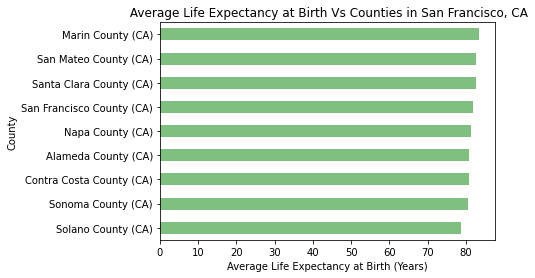

In [25]:
SF_Health_Chart = sorted_SF_df.plot(kind ="barh", facecolor="green", align="center", alpha=0.5, legend=False)

# Set the xlabel and ylabel using class methods
SF_Health_Chart.set_xlabel("Average Life Expectancy at Birth (Years)")
SF_Health_Chart.set_ylabel("County")
SF_Health_Chart.set_title(" Average Life Expectancy at Birth Vs Counties in San Francisco, CA")

In [26]:
SF_Health_Chart.figure.savefig('F:/Final_green_city/green_city/Output/Figures/SF_Life Expectancy.png')

# Linear Regression _ San Francisco, CA

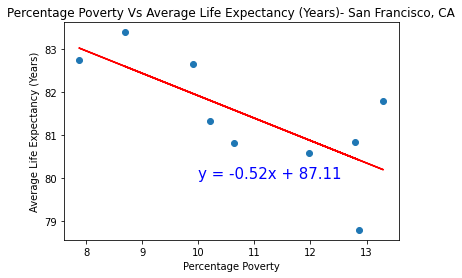

In [58]:
x_values = SF_Income_Health_df["All Ages in Poverty Percent"]
y_values = SF_Income_Health_df["Average Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,80),fontsize=15,color="blue")
plt.xlabel('Percentage Poverty')
plt.ylabel('Average Life Expectancy (Years)')
SF_Scatter_Chart = plt.title("Percentage Poverty Vs Average Life Expectancy (Years)- San Francisco, CA")
plt.show()


In [59]:
SF_Scatter_Chart.figure.savefig('F:/Final_green_city/green_city/Output/Figures/SF_Life Expectancy Vs Percentage Poverty.png')

In [60]:
print(f"The r-squared value for San Francisco, CA is: {rvalue**2}")
print(f"The r-squared value for San Francisco, CA is: {rvalue}")

The r-squared value for San Francisco, CA is: 0.5235492048825083
The r-squared value for San Francisco, CA is: -0.7235670009629436


# Baton Rouge, LA

In [30]:
BR_Income_Health_df = Final_Income_Life_mean_df.loc[(Final_Income_Life_mean_df["County"]=="Ascension Parish (LA)") | (Final_Income_Life_mean_df["County"]=="East Baton Rouge Parish (LA)") | (Final_Income_Life_mean_df["County"]=="East Feliciana Parish (LA)") | (Final_Income_Life_mean_df["County"]=="Iberville Parish (LA)") | (Final_Income_Life_mean_df["County"]=="Livingston Parish (LA)") | (Final_Income_Life_mean_df["County"]=="Pointe Coupee Parish (LA)") | (Final_Income_Life_mean_df["County"]=="St. Helena Parish (LA)") | (Final_Income_Life_mean_df["County"]=="West Baton Rouge Parish (LA)") | (Final_Income_Life_mean_df["County"]=="West Feliciana Parish (LA)")]
BR_Income_Health_df

,County,All Ages in Poverty Percent,Median Household Income,Average Life Expectancy
2,Ascension Parish (LA),11.983333,67183.166667,78.400000
6,East Baton Rouge Parish (LA),19.283333,47202.333333,74.965432
7,East Feliciana Parish (LA),20.483333,41621.666667,76.000000
8,Iberville Parish (LA),22.483333,41200.500000,74.028571
9,Livingston Parish (LA),13.500000,55066.666667,76.040000
12,Pointe Coupee Parish (LA),19.683333,42038.666667,76.933333
18,St. Helena Parish (LA),23.716667,34395.166667,74.750000
20,West Baton Rouge Parish (LA),16.633333,49285.166667,76.620000
21,West Feliciana Parish (LA),23.700000,52030.500000,77.150000


# Bar Graph _Baton Rouge, LA

In [31]:
BR_df = BR_Income_Health_df.loc[:, ["County", "Average Life Expectancy"]]
BR_df.head()

,County,Average Life Expectancy
2,Ascension Parish (LA),78.400000
6,East Baton Rouge Parish (LA),74.965432
7,East Feliciana Parish (LA),76.000000
8,Iberville Parish (LA),74.028571
9,Livingston Parish (LA),76.040000


In [32]:
BR_df.set_index("County", inplace=True)

In [33]:
sort_BR_df = BR_df.sort_values (by =["Average Life Expectancy"], axis = 0, ascending=[True])
sort_BR_df

,Average Life Expectancy
County,
Iberville Parish (LA),74.028571
St. Helena Parish (LA),74.750000
East Baton Rouge Parish (LA),74.965432
East Feliciana Parish (LA),76.000000
Livingston Parish (LA),76.040000
West Baton Rouge Parish (LA),76.620000
Pointe Coupee Parish (LA),76.933333
West Feliciana Parish (LA),77.150000
Ascension Parish (LA),78.400000


Text(0.5, 1.0, 'Average Life Expectancy at Birth Vs Counties in Baton Rouge, LA')

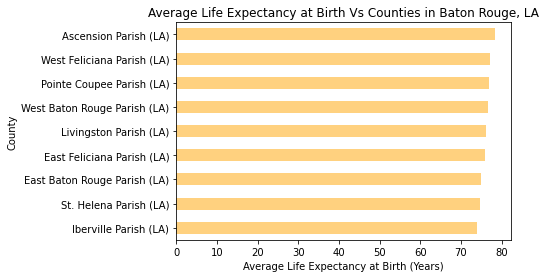

In [34]:
BR_Life_Chart = sort_BR_df.plot(kind ="barh", facecolor="orange", align="center", alpha=0.5, legend=False)

# Set the xlabel and ylabel using class methods
BR_Life_Chart.set_xlabel("Average Life Expectancy at Birth (Years)")
BR_Life_Chart.set_ylabel("County")
BR_Life_Chart.set_title("Average Life Expectancy at Birth Vs Counties in Baton Rouge, LA")

In [35]:
BR_Life_Chart.figure.savefig('F:/Final_green_city/green_city/Output/Figures/BR_Life Expectancy.png')

# Linear Regression Model _ Baton Rouge, LA

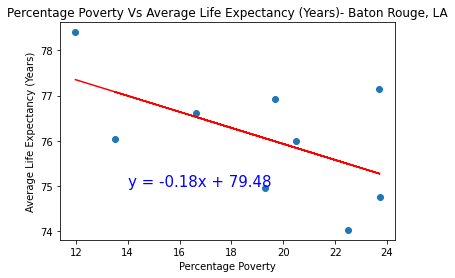

In [36]:
x_values = BR_Income_Health_df["All Ages in Poverty Percent"]
y_values = BR_Income_Health_df["Average Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,75),fontsize=15,color="blue")
plt.xlabel('Percentage Poverty')
plt.ylabel('Average Life Expectancy (Years)')
BR_Scatter_Chart = plt.title("Percentage Poverty Vs Average Life Expectancy (Years)- Baton Rouge, LA")
plt.show()

In [56]:
print(f"The r-squared value for Baton Rouge, LA is: {rvalue**2}")
print(f"The r-squared value for Baton Rouge, LA is: {rvalue}")

The r-squared value for Baton Rouge, LA is: 0.5509410149797712
The r-squared value for Baton Rouge, LA is: -0.7422540097431413


In [38]:
BR_Scatter_Chart.figure.savefig('F:/Final_green_city/green_city/Output/Figures/BR_Life Expectancy Vs Percentage Poverty.png')

# Pittsburgh, PA

In [39]:
PIT_Income_Health_df = Final_Income_Life_mean_df.loc[(Final_Income_Life_mean_df["County"]=="Allegheny County (PA)") | (Final_Income_Life_mean_df["County"]=="Beaver County (PA)") | (Final_Income_Life_mean_df["County"]=="Butler County (PA)") | (Final_Income_Life_mean_df["County"]=="Washington County (PA)") | (Final_Income_Life_mean_df["County"]=="Westmoreland County (PA)")]
PIT_Income_Health_df

,County,All Ages in Poverty Percent,Median Household Income,Average Life Expectancy
1,Allegheny County (PA),12.800000,51033.333333,77.236134
3,Beaver County (PA),12.583333,48246.666667,77.204000
4,Butler County (PA),9.266667,58961.666667,78.867442
19,Washington County (PA),10.616667,53681.500000,76.985965
22,Westmoreland County (PA),10.666667,50185.000000,77.955102


# Bar Graph _Pittsburgh, PA

In [40]:
PIT_df = PIT_Income_Health_df.loc[:, ["County", "Average Life Expectancy"]]
PIT_df.head()

,County,Average Life Expectancy
1,Allegheny County (PA),77.236134
3,Beaver County (PA),77.204000
4,Butler County (PA),78.867442
19,Washington County (PA),76.985965
22,Westmoreland County (PA),77.955102


In [41]:
PIT_df.set_index("County", inplace=True)

In [42]:
sort_PIT_df = PIT_df.sort_values (by =["Average Life Expectancy"], axis = 0, ascending=[True])
sort_PIT_df

,Average Life Expectancy
County,
Washington County (PA),76.985965
Beaver County (PA),77.204000
Allegheny County (PA),77.236134
Westmoreland County (PA),77.955102
Butler County (PA),78.867442


Text(0.5, 1.0, 'Average Life Expectancy at Birth Vs Counties in Pittsburgh, PA')

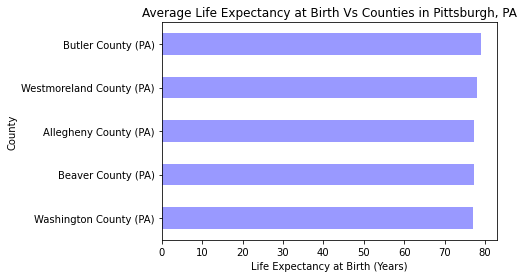

In [43]:
PIT_Life_Chart = sort_PIT_df.plot(kind ="barh", facecolor="blue", align="center", alpha=0.4, legend=False)

# Set the xlabel and ylabel using class methods
PIT_Life_Chart.set_xlabel("Life Expectancy at Birth (Years)")
PIT_Life_Chart.set_ylabel("County")
PIT_Life_Chart.set_title("Average Life Expectancy at Birth Vs Counties in Pittsburgh, PA")

In [44]:
PIT_Life_Chart.figure.savefig('F:/Final_green_city/green_city/Output/Figures/PIT_Life Expectancy.png')

# Linear Regression Model _ Pittsburgh, PA

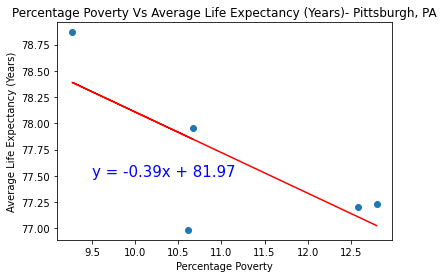

In [45]:
x_values = PIT_Income_Health_df["All Ages in Poverty Percent"]
y_values = PIT_Income_Health_df["Average Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(9.5,77.50),fontsize=15,color="blue")
plt.xlabel('Percentage Poverty')
plt.ylabel('Average Life Expectancy (Years)')
PIT_Scatter_Chart = plt.title("Percentage Poverty Vs Average Life Expectancy (Years)- Pittsburgh, PA")
plt.show()

In [55]:
print(f"The r-squared value for Pittsburg, PA is: {rvalue**2}")
print(f"The r-squared value for Pittsburg, PA is: {rvalue}")

The r-squared value for Pittsburg, PA is: 0.5509410149797712
The r-squared value for Pittsburg, PA is: -0.7422540097431413


In [47]:
PIT_Scatter_Chart.figure.savefig('F:/Final_green_city/green_city/Output/Figures/PIT_Life Expectancy Vs Percentage Poverty.png')

# Comparison of San Francisco, Baton Rouge and Pittsburgh

# Life Expectancy at Birth

In [48]:
Country_Life_df.head()

,State,County,Life Expectancy
0,California,"Alameda County, CA",87.2
1,California,"Alameda County, CA",81.5
2,California,"Alameda County, CA",87.2
3,California,"Alameda County, CA",82.9
4,California,"Alameda County, CA",78.8


The lower quartile of Life Expectancy is: 77.7
The upper quartile of Life Expectancy is: 82.7
The interquartile range of Life Expectancy is: 5.0
The median of Life Expectancy is: 80.5 
Values below 70.2 could be outliers.
Values above 90.2 could be outliers.


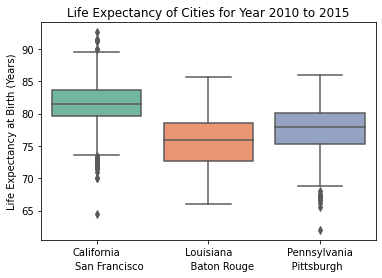

In [49]:
ax = sns.boxplot(x="State", y="Life Expectancy", data=Country_Life_df, palette="Set2")
ax.set_title('Life Expectancy of Cities for Year 2010 to 2015')
ax.set_ylabel('Life Expectancy at Birth (Years)')
ax.set_xlabel('San Francisco               Baton Rouge            Pittsburgh')

LifeExpectancy = Country_Life_df["Life Expectancy"]
quartiles = LifeExpectancy.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Life Expectancy is: {lowerq}")
print(f"The upper quartile of Life Expectancy is: {upperq}")
print(f"The interquartile range of Life Expectancy is: {iqr}")
print(f"The median of Life Expectancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [50]:
ax.figure.savefig('F:/Final_green_city/green_city/Output/Figures/Life Expectancy.png')

# ANOVA 

In [51]:
# Extract individual groups
group1 = Country_Life_df[Country_Life_df["State"] == "California"]["Life Expectancy"]
group2 = Country_Life_df[Country_Life_df["State"] == "Louisiana"]["Life Expectancy"]
group3 = Country_Life_df[Country_Life_df["State"] == "Pennsylvania"]["Life Expectancy"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=413.2780320500871, pvalue=2.5351503370528003e-153)

# At 95% confidence interval:
     alpha  = 0.05 
     pvalue = 2.53
     pvalue > alpha 
Unable to reject the Null Hypothesis


# Income and Poverty 

In [52]:
Country_Income_df.head()

,State,Year,County,Median Household Income in Dollars,All Ages in Poverty Percent,Median Household Income
0,42,2015,Allegheny County (PA),"$54,412",12.2,54412
1,42,2014,Allegheny County (PA),"$52,385",13.1,52385
2,42,2013,Allegheny County (PA),"$51,400",13.5,51400
3,42,2012,Allegheny County (PA),"$50,831",12.7,50831
4,42,2011,Allegheny County (PA),"$49,682",13.4,49682


In [53]:
# Extract individual groups
group1 = Country_Income_df[Country_Income_df["State"] == 6]["All Ages in Poverty Percent"]
group2 = Country_Income_df[Country_Income_df["State"] == 22]["All Ages in Poverty Percent"]
group3 = Country_Income_df[Country_Income_df["State"] == 42]["All Ages in Poverty Percent"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=113.51068594734842, pvalue=1.2105150981230119e-29)

# At 95% confidence interval:

    alpha  = 0.05 
    pvalue = 1.21
    pvalue > alpha 
Unable to reject the Null Hypothesis


# Conclusion
There no significant difference found in Percentage Poverty or Life expectancy at birth in top ranking green city, lowest ranking green city or non green city during 2010 to 2015 according to census data analysis. This is a model to analyze Percentage Poverty or Life expectancy at birth of cities in United States. Expanding this project with more cities will be the best solution to find the accurate correlation between green citifies and standards of living. 
